In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum() # no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

classification - check if classes are balanced or imbalanced

`pip install imblearn` to handle class - imbalance


<Axes: ylabel='count'>

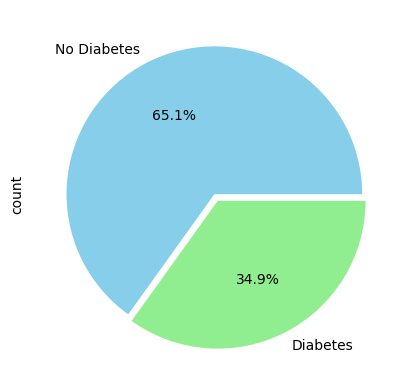

In [4]:
df.Outcome.value_counts().plot(kind='pie', autopct='%.1f%%', 
    labels=['No Diabetes', 'Diabetes'],
    colors=['skyblue', 'lightgreen'], explode=[0, 0.05])

importing libraries

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("training data =>",X_train.shape, X_test.shape)


training data => (614, 8) (154, 8)


In [7]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
model

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [8]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

grid search cv - to find best parameters for the model

In [9]:
list(range(5, 100, 10)) # just to see the range

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [10]:
# `dt` is the name of the decision tree classifier in the pipeline
params = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': list(range(5, 100, 10))
}

grid = GridSearchCV(model, param_grid=params, cv=5, verbose=1)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

fitting the model

In [11]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

best parameters

In [12]:
grid.best_params_

{'dt__criterion': 'entropy', 'dt__max_depth': 5}

all the metrics as a dataframe

In [13]:
result_df = pd.DataFrame( grid.cv_results_ )
result_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.003122,0.000023,0.000875,0.000012,entropy,5,"{'dt__criterion': 'entropy', 'dt__max_depth': 5}",0.723577,0.699187,0.796748,0.739837,0.778689,0.747608,0.035674,1
20,0.003129,0.000040,0.000857,0.000010,log_loss,5,"{'dt__criterion': 'log_loss', 'dt__max_depth': 5}",0.723577,0.699187,0.788618,0.739837,0.778689,0.745982,0.033517,2
0,0.003743,0.000541,0.001269,0.000121,gini,5,"{'dt__criterion': 'gini', 'dt__max_depth': 5}",0.707317,0.715447,0.739837,0.756098,0.795082,0.742756,0.031389,3
25,0.003812,0.000029,0.000881,0.000014,log_loss,55,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.715447,0.682927,0.756098,0.731707,0.754098,0.728055,0.027105,4
21,0.003827,0.000047,0.000881,0.000016,log_loss,15,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.699187,0.691057,0.764228,0.739837,0.745902,0.728042,0.028171,5
29,0.003840,0.000048,0.000882,0.000014,log_loss,95,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.699187,0.715447,0.764228,0.707317,0.737705,0.724777,0.023538,6
14,0.003814,0.000029,0.000873,0.000021,entropy,45,"{'dt__criterion': 'entropy', 'dt__max_depth': 45}",0.723577,0.682927,0.739837,0.756098,0.721311,0.724750,0.024383,7
22,0.003922,0.000096,0.000902,0.000022,log_loss,25,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.674797,0.691057,0.747967,0.707317,0.786885,0.721605,0.040706,8
26,0.003823,0.000018,0.000871,0.000019,log_loss,65,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.691057,0.674797,0.747967,0.747967,0.745902,0.721538,0.031951,9
16,0.003805,0.000028,0.000872,0.000026,entropy,65,"{'dt__criterion': 'entropy', 'dt__max_depth': 65}",0.691057,0.666667,0.764228,0.756098,0.729508,0.721511,0.037471,10


extract the best model

In [14]:
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

check the confusion matrix

In [15]:
y_pred = best_model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cf

array([[89, 16],
       [19, 30]])

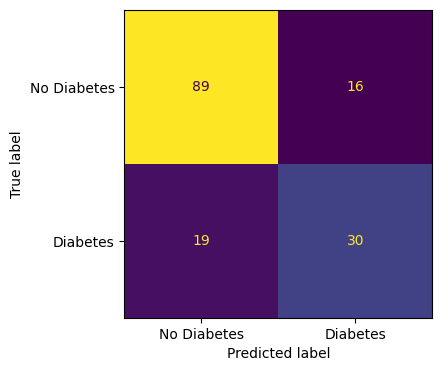

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay(cf, display_labels=['No Diabetes', 'Diabetes']).plot(ax=ax, colorbar=False)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.65      0.61      0.63        49

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



plottling grid search results

<Axes: >

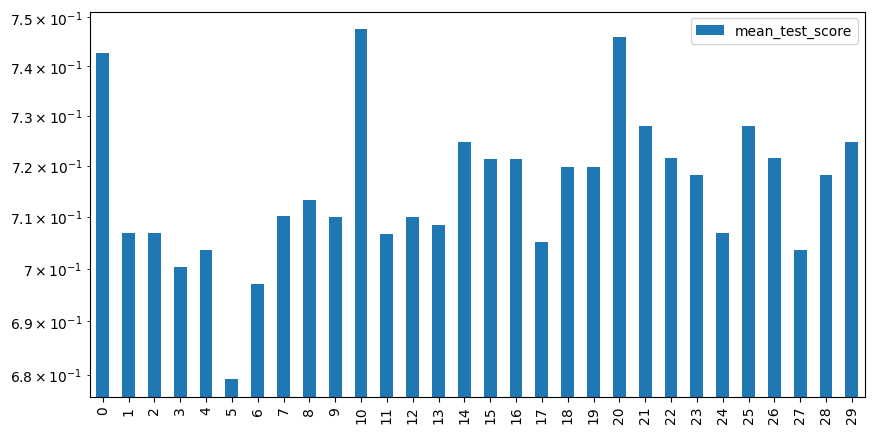

In [18]:
result_df[['mean_test_score']].plot(kind='bar', logy=True, figsize=(10, 5))

In [19]:
import joblib

joblib.dump(best_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

#### task for you => make a gradio app for this model

Understand undersampling 

In [20]:
# pip install imblearn

In [21]:
from imblearn.under_sampling import RandomUnderSampler

before undersample
Outcome
0    395
1    219
Name: count, dtype: int64
after undersample
Outcome
0    219
1    219
Name: count, dtype: int64


<Axes: ylabel='count'>

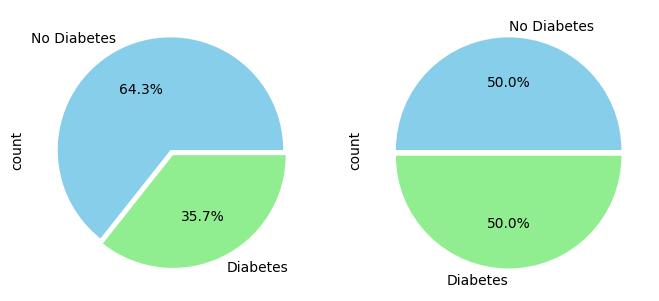

In [22]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
rus = RandomUnderSampler()
print("before undersample")
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie', 
    autopct='%.1f%%', 
    labels=['No Diabetes', 'Diabetes'],
    colors=['skyblue', 'lightgreen'], 
    explode=[0, 0.05],
    ax=ax1)

X_train, y_train = rus.fit_resample(X_train, y_train)
print("after undersample")
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie', 
    autopct='%.1f%%', 
    labels=['No Diabetes', 'Diabetes'],
    colors=['skyblue', 'lightgreen'], 
    explode=[0, 0.05],
    ax=ax2)

In [29]:
X.columns.tolist()


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [46]:
import gradio as gr
import pandas as pd
import joblib

# Define the predict_diabetes function
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    # Create a dictionary with input data
    data = {
        'Pregnancies': Pregnancies,
        'Glucose': Glucose,
        'BloodPressure': BloodPressure,
        'SkinThickness': SkinThickness,
        'Insulin': Insulin,
        'BMI': BMI,
        'DiabetesPedigreeFunction': DiabetesPedigreeFunction,
        'Age': Age
    }
    
    X_inp=pd.DataFrame([data])
    dec=joblib.load('diabetes_model.pkl')
    y_pred=dec.predict(X_inp)

    return  y_pred

   




In [48]:
ui = gr.Interface(
    predict_diabetes,
    inputs = [
        gr.Number(label='Pregnancies'),
        gr.Number(label='Glucose', step=.01),
        gr.Number(label='BloodPressure', step=.01),
        gr.Number(label='SkinThickness', step=.01),
        gr.Number(label='BMI', step=.01),
        gr.Number(label='DiabetesPesdigreeFunction', step=.01),
        gr.Number(label='Age', step=.01),
        
    ],
    outputs = 'text',
    title = "Diabetes ",
    examples=df.iloc[:5].values.tolist()
)
ui.launch()

/Users/ayush/miniconda3/lib/python3.10/site-packages/gradio/utils.py:860: UserWarning: Expected 8 arguments for function <function predict_diabetes at 0x280fda4d0>, received 7.
  warnings.warn(
/Users/ayush/miniconda3/lib/python3.10/site-packages/gradio/utils.py:864: UserWarning: Expected at least 8 arguments for function <function predict_diabetes at 0x280fda4d0>, received 7.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


/Users/ayush/miniconda3/lib/python3.10/site-packages/gradio/helpers.py:837: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")
/Users/ayush/miniconda3/lib/python3.10/site-packages/gradio/helpers.py:837: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")
/Users/ayush/miniconda3/lib/python3.10/site-packages/gradio/helpers.py:837: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")
/Users/ayush/miniconda3/lib/python3.10/site-packages/gradio/helpers.py:837: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")
/Users/ayush/miniconda3/lib/python3.10/site-packages/gradio/helpers.py:837: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")
/Users/ayush/miniconda3/lib/python3.10/site-packages/gradio/